In [212]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [213]:
all_misspelled_requests = []

In [214]:
def request_constructor(not_normalized_requests, query_slot):
    for par in range(len(not_normalized_requests)):
        sent = not_normalized_requests[par].split()
        try:
            idx_slot = [idx for idx in range(len(sent)) if query_slot in sent[idx]][0]
        except IndexError:
            print(par)
        
        idx_without_colon = [idx for idx in range(len(sent)) if ':' not in sent[idx]][:-2]
        slot = sent[idx_slot].split('-')[-1]

        if len(idx_without_colon):
            for i in range(idx_without_colon[0], idx_slot + 1):
                if i == idx_without_colon[0]:
                    sent[i] = sent[i] + ':B-' + slot
                else:
                    sent[i] = sent[i].split(':')[0] + ':I-' + slot

            not_normalized_requests[par] = ' '.join(sent)
            
    return not_normalized_requests

# product_conditions

In [215]:
all_product_conditions = []

### loan

In [216]:
loan_product_conditions = []

# All loan
loan = ['Хадгаламж барицаалсан', 'Хадгаламж барцаалсан']

In [217]:
loan_samples_all = [
    'SLOT:B-loan зээл:O авахад:B-action урьдчилгаа:B-condition төлбөр:I-condition гэж:O байдаг:O уу:O <=> product_conditions',
    'SLOT:B-loan зээл:O авахад:B-action урьдчилгаа:B-condition төлбөртэй:I-condition юу:O <=> product_conditions',
    'SLOT:B-loan зээл:O авахад:B-action урьдчилгаа:B-condition төлбөр:I-condition гэж:O байдаг:O уу:O мэдээлэл:O авмаар:B-action байна:O <=> product_conditions',
    'SLOT:B-loan зээл:O авахад:B-action урьдчилгаа:B-condition төлбөр:I-condition гэж:O байдаг:O уу:O хэд:B-question_type вэ:O <=> product_conditions',
]

In [218]:
for word in loan:
    loan_product_conditions += [sent.replace('SLOT', word).strip() for sent in loan_samples_all]
    
loan_product_conditions = list(set(loan_product_conditions))

loan_product_conditions = request_constructor(loan_product_conditions, 'B-loan')
len(loan_product_conditions)

8

### card

In [219]:
card_product_conditions = []

# Жилийн хураамж, зээлийн дээд/доод хэмжээ
card_1 = [
    'Алтан Крэдит', 
          
    'Американ экспрэсс', 'Амэрикан экспресс', 'Амэрикан экспрэсс', 'Америк экспресс', 
    'Америк экспрэсс', 'Амэрик экспресс', 'Амэрикан экспрэсс',
    'Американ экспрэс', 'Амэрикан экспрес', 'Амэрикан экспрэс', 'Америк экспрес', 
    'Америк экспрэс', 'Амэрик экспрес', 'Амэрикан экспрэс',

    'Амэрикан экспресс ногоон', 'Амэрикан экспрэсс ногоон', 'Америк экспресс ногоон', 
    'Америк экспрэсс ногоон', 'Амэрик экспресс ногоон', 'Амэрикан экспрэсс ногоон',
    'Амэрикан экспрес ногоон', 'Амэрикан экспрэс ногоон', 'Америк экспрес ногоон', 
    'Америк экспрэс ногоон', 'Амэрик экспрес ногоон', 'Амэрикан экспрэс ногоон',

    'Амэрикан экспресс алтан', 'Амэрикан экспрэсс алтан', 'Америк экспресс алтан', 
    'Америк экспрэсс алтан', 'Амэрик экспресс алтан', 'Амэрикан экспрэсс алтан',
    'Амэрикан экспрес алтан', 'Амэрикан экспрэс алтан', 'Америк экспрес алтан', 
    'Америк экспрэс алтан', 'Амэрик экспрес алтан', 'Амэрикан экспрэс алтан',        
]

# Вальют, хүчинтэй хугацаа, эрх
card_2 = card_1 + ['Колр']

# Захиалах үнэ
card_3 = [
    'Амэрикан экспресс рэвардс', 'Амэрикан экспрэсс рэвардс', 'Америк экспресс рэвардс', 
    'Америк экспрэсс рэвардс', 'Амэрик экспресс рэвардс', 'Амэрикан экспрэсс рэвардс',
    'Амэрикан экспрес рэвардс', 'Амэрикан экспрэс рэвардс', 'Америк экспрес рэвардс', 
    'Америк экспрэс рэвардс', 'Амэрик экспрес рэвардс', 'Амэрикан экспрэс рэвардс',
    
    'Колр',
]

# Өдөрт гаргах бэлэн/бэлэн бус гүйлгээний лимит, эргэн төлөх доод хэмжээ
# эргэн төлөлт хийгээгүй тохиолдолд карт хаагдах хугацаа
card_4 = card_1

In [220]:
card_samples_1 = [
    'SLOT:B-card картны:O жилийн:B-condition хураамж:I-condition хэд:B-question_type вэ:O <=> product_conditions',
    'SLOT:B-card картны:O жилийн:B-condition хураамж:I-condition хэдтэй:B-question_type байгаа:O вэ:O <=> product_conditions',
    'SLOT:B-card картны:O жилийн:B-condition хураамж:I-condition хэд:B-question_type байгааг:O хэлээд:B-action өгөөч:I-action <=> product_conditions',
    'SLOT:B-card картны:O жилийн:B-condition хураамж:I-condition хэд:B-question_type байгааг:O хараад:B-action өгч:I-action болох:O уу:O <=> product_conditions',
    
    'SLOT:B-card картны:O зээлийн:B-condition дээд:I-condition хэмжээ:I-condition хэд:B-question_type вэ:O <=> product_conditions',
    'SLOT:B-card картны:O зээлийн:B-condition дээд:I-condition хэмжээ:I-condition хэдтэй:B-question_type байгаа:O вэ:O <=> product_conditions',
    'SLOT:B-card картны:O зээлийн:B-condition дээд:I-condition хэмжээ:I-condition хэд:B-question_type байгааг:O хэлээд:B-action өгөөч:I-action <=> product_conditions',
    'SLOT:B-card картны:O зээлийн:B-condition дээд:I-condition хэмжээ:I-condition хэд:B-question_type байгааг:O хараад:B-action өгч:I-action болох:O уу:O <=> product_conditions',
    
    'SLOT:B-card картны:O зээлийн:B-condition доод:I-condition хэмжээ:I-condition хэд:B-question_type вэ:O <=> product_conditions',
    'SLOT:B-card картны:O зээлийн:B-condition доод:I-condition хэмжээ:I-condition хэдтэй:B-question_type байгаа:O вэ:O <=> product_conditions',
    'SLOT:B-card картны:O зээлийн:B-condition доод:I-condition хэмжээ:I-condition хэд:B-question_type байгааг:O хэлээд:B-action өгөөч:I-action <=> product_conditions',
    'SLOT:B-card картны:O зээлийн:B-condition доод:I-condition хэмжээ:I-condition хэд:B-question_type байгааг:O хараад:B-action өгч:I-action болох:O уу:O <=> product_conditions',
]

card_samples_2 = [
    'SLOT:B-card картыг:O ямар:B-question_type вальюттай:B-condition нээж:B-action болох:O вэ:O <=> product_conditions',
    'SLOT:B-card картыг:O ямар:B-question_type вальюттай:B-condition захиалж:B-action болох:O вэ:O <=> product_conditions',
    'SLOT:B-card картыг:O долларын:B-currency вальюттай:B-condition нээж:B-action болох:O уу:O <=> product_conditions',
    'SLOT:B-card картыг:O долларын:B-currency вальюттай:B-condition захиалж:B-action болох:O уу:O <=> product_conditions',
    'SLOT:B-card картыг:O доллараар:B-currency нээж:B-action болох:O уу:O <=> product_conditions',
    'SLOT:B-card картыг:O доллараар:B-currency захиалж:B-action болох:O уу:O <=> product_conditions',
    
    'SLOT:B-card картыг:O ямар:B-question_type вальютуудаар:B-condition захиалж:B-action болдог:O вэ:O <=> product_conditions',
    
    'SLOT:B-card картны:O хүчинтэй:B-condition хугацаа:I-condition нь:O юу:B-question_type вэ:O <=> product_conditions',
    'SLOT:B-card картны:O хүчинтэй:B-condition хугацаа:I-condition нь:O хэдэн:B-question_type жил:O вэ:O <=> product_conditions',
    'SLOT:B-card карт:O хэр:B-question_type удаан:O хүчинтэй:B-condition вэ:O <=> product_conditions',
    
    'Энэ:O SLOT:B-card карт:O ямар:B-question_type эрхтэй:B-condition вэ:O <=> product_conditions',
    'Энэ:O SLOT:B-card картыг:O би:O дотоодод:B-condition ашиглаж:B-action болох:O уу:O <=> product_conditions',
    'Энэ:O SLOT:B-card картыг:O би:O олон:B-condition улсад:I-condition ашиглаж:B-action болох:O уу:O <=> product_conditions',
    'Энэ:O SLOT:B-card картыг:O би:O гадаадад:B-condition ашиглаж:B-action болох:O уу:O <=> product_conditions',
    'Энэ:O SLOT:B-card картыг:O би:O дотоодоос:B-condition гадна:I-condition ашиглаж:B-action болох:O уу:O <=> product_conditions',
]

card_samples_3 = [
    'SLOT:B-card картны:O үнэ:B-condition хэд:B-question_type вэ:O <=> product_conditions',
    'SLOT:B-card картыг:O захиалахад:B-action хэд:B-question_type вэ:O <=> product_conditions',
    'SLOT:B-card картыг:O захиалмаар:B-action байна:O хэдээр:B-question_type авах:B-action вэ:O <=> product_conditions',
    'SLOT:B-card картыг:O захиалмаар:B-action байна:O хэдээр:B-question_type нээх:B-action вэ:O <=> product_conditions',
    'SLOT:B-card картыг:O захиалмаар:B-action байна:O хэд:B-question_type болох:O уу:O <=> product_conditions',
    'SLOT:B-card картыг:O захиалахад:B-action хэдийг:B-question_type төлөх:B-action үү:O <=> product_conditions',
    
    
    'SLOT:B-card картыг:O нээхэд:B-action хэд:B-question_type вэ:O <=> product_conditions',
    'SLOT:B-card картыг:O нээлгэмээр:B-action байна:O хэдээр:B-question_type нээх:B-action үү:O <=> product_conditions',
    'SLOT:B-card картыг:O нээлгэмээр:B-action байна:O хэд:B-question_type болох:O уу:O <=> product_conditions',
    'SLOT:B-card картыг:O нээлгэхэд:B-action хэдийг:B-question_type төлөх:B-action үү:O <=> product_conditions',
]

card_samples_4 = [
    'SLOT:B-card картны:O өдөрт:B-condition гаргах:I-condition бэлэн:I-condition гүйлгээний:I-condition лимит:I-condition хэд:B-question_type байна:O <=> product_conditions',
    'SLOT:B-card картны:O өдөрт:B-condition гаргах:I-condition бэлэн:I-condition гүйлгээний:I-condition лимит:I-condition хэд:B-question_type байгааг:O хэлээд:B-action өгөөч:I-action <=> product_conditions',
    'SLOT:B-card картны:O өдөрт:B-condition гаргах:I-condition бэлэн:I-condition гүйлгээний:I-condition лимит:I-condition хэд:B-question_type байгааг:O хараад:B-action өгч:O болохоор:O байна:O уу:O <=> product_conditions',
    
    'SLOT:B-card картны:O өдөрт:B-condition гаргах:I-condition бэлэн:I-condition бус:I-condition гүйлгээний:I-condition лимит:I-condition хэд:B-question_type байна:O <=> product_conditions',
    'SLOT:B-card картны:O өдөрт:B-condition гаргах:I-condition бэлэн:I-condition бус:I-condition гүйлгээний:I-condition лимит:I-condition хэд:B-question_type байгааг:O хэлээд:B-action өгөөч:I-action <=> product_conditions',
    'SLOT:B-card картны:O өдөрт:B-condition гаргах:I-condition бэлэн:I-condition бус:I-condition гүйлгээний:I-condition лимит:I-condition хэд:B-question_type байгааг:O хараад:B-action өгч:O болохоор:O байна:O уу:O <=> product_conditions',
    
    'Өдөрт:B-condition SLOT:B-card картаар:O гаргах:I-condition бэлэн:I-condition гүйлгээний:I-condition лимит:I-condition хэд:B-question_type байна:O <=> product_conditions',
    'Өдөрт:B-condition SLOT:B-card картаар:O гаргах:I-condition бэлэн:I-condition гүйлгээний:I-condition лимит:I-condition хэд:B-question_type байгааг:O хэлээд:B-action өгөөч:I-action <=> product_conditions',
    'Өдөрт:B-condition SLOT:B-card картаар:O гаргах:I-condition бэлэн:I-condition гүйлгээний:I-condition лимит:I-condition хэд:B-question_type байгааг:O хараад:B-action өгч:O болохоор:O байна:O уу:O <=> product_conditions',
    
    'Өдөрт:B-condition SLOT:B-card картаар:O гаргах:I-condition бэлэн:I-condition бус:I-condition гүйлгээний:I-condition лимит:I-condition хэд:B-question_type байна:O <=> product_conditions',
    'Өдөрт:B-condition SLOT:B-card картаар:O гаргах:I-condition бэлэн:I-condition бус:I-condition гүйлгээний:I-condition лимит:I-condition хэд:B-question_type байгааг:O хэлээд:B-action өгөөч:I-action <=> product_conditions',
    'Өдөрт:B-condition SLOT:B-card картаар:O гаргах:I-condition бэлэн:I-condition бус:I-condition гүйлгээний:I-condition лимит:I-condition хэд:B-question_type байгааг:O хараад:B-action өгч:O болохоор:O байна:O уу:O <=> product_conditions',
    
    'Танай:O SLOT:B-card картны:O эргэн:B-condition төлөх:I-condition доод:I-condition хэмжээ:I-condition нь:O хэд:B-question_type байна:O <=> product_conditions',
    'Танай:O SLOT:B-card картны:O эргэн:B-condition төлөх:I-condition доод:I-condition хэмжээ:I-condition нь:O хэд:B-question_type байгааг:O хэлээд:B-action өгөөч:I-action <=> product_conditions',
    'Танай:O SLOT:B-card картны:O эргэн:B-condition төлөх:I-condition доод:I-condition хэмжээ:I-condition нь:O хэд:B-question_type хараад:B-action өгч:O болохоор:O байна:O уу:O <=> product_conditions',
    
    'Би:O SLOT:B-card картныхаа:O эргэн:B-condition төлөлтөө:I-action хийгээгүй:B-action <=> product_conditions',
    'Би:O SLOT:B-card картныхаа:O эргэн:B-condition төлөлтөө:I-action хийгээгүй:B-action байгаа:O бол:O миний:O карт:O яах:B-question_type уу:O <=> product_conditions',
    'Би:O SLOT:B-card картныхаа:O эргэн:B-condition төлөлтөө:I-action хийгээгүй:B-action бол:O хэдийг:O төлөх:O үү:O <=> product_conditions',
    'Би:O SLOT:B-card картныхаа:O эргэн:B-condition төлөлтөө:I-action хийгээгүй:B-action байгаа:O тэгээд:O одоо:O миний:O картыг:O хаачих:B-action уу:O <=> product_conditions',
]

In [221]:
for word in card_1:
    card_product_conditions += [sent.replace('SLOT', word).strip() for sent in card_samples_1]

for word in card_2:
    card_product_conditions += [sent.replace('SLOT', word).strip() for sent in card_samples_2]
    
for word in card_3:
    card_product_conditions += [sent.replace('SLOT', word).strip() for sent in card_samples_3]
    
for word in card_4:
    card_product_conditions += [sent.replace('SLOT', word).strip() for sent in card_samples_4]
    
    
card_product_conditions = list(set(card_product_conditions))

card_product_conditions = request_constructor(card_product_conditions, 'B-card')
len(card_product_conditions)

1643

In [222]:
all_product_conditions += loan_product_conditions + card_product_conditions
print('All misspelled product conditions:', len(all_product_conditions))

All misspelled product conditions: 1651


# tutorials

In [223]:
all_tutorials = []

### loan

In [224]:
loan_tutorials = []

In [225]:
loan_samples_all = [
    'SLOT:B-loan зээл:O авмаар:B-action байна:O яаж:B-question_type авах:O уу:O <=> tutorials',
    'SLOT:B-loan зээл:O авмаар:B-action байна:O хаанаас:B-question_type мэдээлэл:O авах:B-action уу:O <=> tutorials',
    'SLOT:B-loan зээл:O авахад:B-action ямар:B-question_type шаардлагууд:B-condition байгаа:O вэ:O <=> tutorials',
    'SLOT:B-loan зээл:O авахад:B-action бүрдүүлэх:B-condition материалууд:I-condition гэж:O байгаа:O юу:O <=> tutorials',
    'SLOT:B-loan зээл:O авмаар:B-action байна:O аа:O яах:B-question_type уу:O <=> tutorials',
    
    'SLOT:B-loan зээл:O авмаар:B-action байна:O яаж:B-question_type авах:O уу:O урьдчилгаа:B-condition төлбөртэй:I-condition юу:O <=> tutorials',
    'SLOT:B-loan зээл:O авмаар:B-action байна:O хаанаас:B-question_type мэдээлэл:O авах:B-action уу:O урьдчилгаа:B-condition төлбөртэй:I-condition юу:O <=> tutorials',
    'SLOT:B-loan зээл:O авахад:B-action ямар:B-question_type шаардлагууд:B-condition байгаа:O вэ:O урьдчилгаа:B-condition төлбөртэй:I-condition юу:O <=> tutorials',
    'SLOT:B-loan зээл:O авахад:B-action бүрдүүлэх:B-condition материалууд:I-condition гэж:O байгаа:O юу:O урьдчилгаа:B-condition төлбөртэй:I-condition юу:O <=> tutorials',
    'SLOT:B-loan зээл:O авмаар:B-action байна:O аа:O яах:B-question_type уу:O урьдчилгаа:B-condition төлбөртэй:I-condition юу:O <=> tutorials',
]

In [226]:
for word in loan:
    loan_tutorials += [sent.replace('SLOT', word).strip() for sent in loan_samples_all]
    
loan_tutorials = list(set(loan_tutorials))

loan_tutorials = request_constructor(loan_tutorials, 'B-loan')
len(loan_tutorials)

20

### card

In [227]:
card_tutorials = []

In [228]:
card_samples_1 = [
    'Би:O танай:O SLOT:B-card картыг:O захиалмаар:B-action байна:O <=> tutorials',
    'Би:O танай:O SLOT:B-card картыг:O захиалмаар:B-action байна:O яаж:B-question_type захиалах:B-action вэ:O <=> tutorials',
    'Би:O танай:O SLOT:B-card картыг:O захиалмаар:B-action байна:O хаанаас:B-question_type захиалах:B-action вэ:O <=> tutorials',
    
    'Би:O танай:O SLOT:B-card картыг:O захиалмаар:B-action байна:O яаж:B-question_type захиалах:B-action вэ:O жилийн:B-condition хураамж:I-condition хэд:B-question_type вэ:O <=> tutorials',
    'Би:O танай:O SLOT:B-card картыг:O захиалмаар:B-action байна:O яаж:B-question_type захиалах:B-action вэ:O жилийн:B-condition хураамж:I-condition хэдтэй:B-question_type байгаа:O вэ:O <=> tutorials',
    'Би:O танай:O SLOT:B-card картыг:O захиалмаар:B-action байна:O яаж:B-question_type захиалах:B-action вэ:O жилийн:B-condition хураамж:I-condition хэд:B-question_type байгааг:O хэлээд:B-action өгөөч:I-action <=> tutorials',
    'Би:O танай:O SLOT:B-card картыг:O захиалмаар:B-action байна:O яаж:B-question_type захиалах:B-action вэ:O жилийн:B-condition хураамж:I-condition хэд:B-question_type байгааг:O хараад:B-action өгч:I-action болох:O уу:O <=> tutorials',

    'Би:O танай:O SLOT:B-card картыг:O захиалмаар:B-action байна:O хаанаас:B-question_type захиалах:B-action вэ:O жилийн:B-condition хураамж:I-condition хэд:B-question_type вэ:O <=> tutorials',
    'Би:O танай:O SLOT:B-card картыг:O захиалмаар:B-action байна:O хаанаас:B-question_type захиалах:B-action вэ:O жилийн:B-condition хураамж:I-condition хэдтэй:B-question_type байгаа:O вэ:O <=> tutorials',
    'Би:O танай:O SLOT:B-card картыг:O захиалмаар:B-action байна:O хаанаас:B-question_type захиалах:B-action вэ:O жилийн:B-condition хураамж:I-condition хэд:B-question_type байгааг:O хэлээд:B-action өгөөч:I-action <=> tutorials',
    'Би:O танай:O SLOT:B-card картыг:O захиалмаар:B-action байна:O хаанаас:B-question_type захиалах:B-action вэ:O жилийн:B-condition хураамж:I-condition хэд:B-question_type байгааг:O хараад:B-action өгч:I-action болох:O уу:O <=> tutorials',
    
    'Би:O танай:O SLOT:B-card картыг:O захиалмаар:B-action байна:O яаж:B-question_type захиалах:B-action вэ:O зээлийн:B-condition дээд:I-condition хэмжээ:I-condition нь:O хэд:B-question_type вэ:O <=> tutorials',
    'Би:O танай:O SLOT:B-card картыг:O захиалмаар:B-action байна:O яаж:B-question_type захиалах:B-action вэ:O зээлийн:B-condition дээд:I-condition хэмжээ:I-condition нь:O хэдтэй:B-question_type байгаа:O вэ:O <=> tutorials',
    'Би:O танай:O SLOT:B-card картыг:O захиалмаар:B-action байна:O яаж:B-question_type захиалах:B-action вэ:O зээлийн:B-condition дээд:I-condition хэмжээ:I-condition нь:O хэд:B-question_type байгааг:O хэлээд:B-action өгөөч:I-action <=> tutorials',
    'Би:O танай:O SLOT:B-card картыг:O захиалмаар:B-action байна:O яаж:B-question_type захиалах:B-action вэ:O зээлийн:B-condition дээд:I-condition хэмжээ:I-condition нь:O хэд:B-question_type байгааг:O хараад:B-action өгч:I-action болох:O уу:O <=> tutorials',
    
    'Би:O танай:O SLOT:B-card картыг:O захиалмаар:B-action байна:O яаж:B-question_type захиалах:B-action вэ:O зээлийн:B-condition доод:I-condition хэмжээ:I-condition нь:O хэд:B-question_type вэ:O <=> tutorials',
    'Би:O танай:O SLOT:B-card картыг:O захиалмаар:B-action байна:O яаж:B-question_type захиалах:B-action вэ:O зээлийн:B-condition доод:I-condition хэмжээ:I-condition нь:O хэдтэй:B-question_type байгаа:O вэ:O <=> tutorials',
    'Би:O танай:O SLOT:B-card картыг:O захиалмаар:B-action байна:O яаж:B-question_type захиалах:B-action вэ:O зээлийн:B-condition доод:I-condition хэмжээ:I-condition нь:O хэд:B-question_type байгааг:O хэлээд:B-action өгөөч:I-action <=> tutorials',
    'Би:O танай:O SLOT:B-card картыг:O захиалмаар:B-action байна:O яаж:B-question_type захиалах:B-action вэ:O зээлийн:B-condition доод:I-condition хэмжээ:I-condition нь:O хэд:B-question_type байгааг:O хараад:B-action өгч:I-action болох:O уу:O <=> tutorials',
]

card_samples_2 = [
    'SLOT:B-card картыг:O яаж:B-question_type долларын:B-currency вальюттай:B-condition нээх:B-action үү:O <=> tutorials',
    'SLOT:B-card картыг:O яаж:B-question_type долларын:B-currency вальюттай:B-condition захиалах:B-action уу:O <=> tutorials',
    'SLOT:B-card картыг:O яаж:B-question_type доллараар:B-currency нээх:B-action үү:O <=> tutorials',
    'SLOT:B-card картыг:O яаж:B-question_type доллараар:B-currency захиалах:B-action уу:O <=> tutorials',
    
    'Танай:O SLOT:B-card картыг:O яаж:B-question_type захиалах:B-action вэ:O картны:O хүчинтэй:B-condition хугацаа:I-condition нь:O юу:B-question_type вэ:O <=> tutorials',
    'Танай:O SLOT:B-card картыг:O яаж:B-question_type захиалах:B-action вэ:O картны:O хүчинтэй:B-condition хугацаа:I-condition нь:O хэдэн:B-question_type жил:O вэ:O <=> tutorials',
    
    'Энэ:O SLOT:B-card карт:O яаж:B-question_type захиалах:B-action вэ:O ямар:B-question_type эрхтэй:B-condition вэ:O <=> tutorials',
]

card_samples_3 = [
    'SLOT:B-card картыг:O яаж:B-question_type захиалах:B-action вэ:O үнэ:B-condition хэд:B-question_type вэ:O <=> tutorials',
    'SLOT:B-card карт:O яаж:B-question_type захиалах:B-action вэ:O хэд:B-question_type вэ:O <=> tutorials',
    'SLOT:B-card картыг:O яаж:B-question_type захиалах:B-action вэ:O хэдээр:B-question_type авах:B-action вэ:O <=> tutorials',
    'SLOT:B-card картыг:O яаж:B-question_type захиалах:B-action вэ:O хэдээр:B-question_type нээх:B-action вэ:O <=> tutorials',
    'SLOT:B-card картыг:O яаж:B-question_type захиалах:B-action вэ:O төлөх:B-action үү:O <=> tutorials',
    
    'SLOT:B-card картыг:O яаж:B-question_type нээлгэх:B-action вэ:O үнэ:B-condition хэд:B-question_type вэ:O <=> tutorials',
    'SLOT:B-card карт:O яаж:B-question_type нээлгэх:B-action вэ:O хэд:B-question_type вэ:O <=> tutorials',
    'SLOT:B-card картыг:O яаж:B-question_type нээлгэх:B-action вэ:O хэдээр:B-question_type нээж:B-action байна:O <=> tutorials',
    'SLOT:B-card картыг:O яаж:B-question_type нээлгэх:B-action вэ:O төлөх:B-action үү:O <=> tutorials',
    
]

card_samples_4 = [
    'Танай:O банкны:O SLOT:B-card картыг:O яаж:B-question_type захиалах:B-action вэ:O өдөрт:B-condition гаргах:I-condition бэлэн:I-condition гүйлгээний:I-condition лимит:I-condition хэд:B-question_type байна:O <=> tutorials',
    'Танай:O банкны:O SLOT:B-card картыг:O яаж:B-question_type нээлгэх:B-action вэ:O өдөрт:B-condition гаргах:I-condition бэлэн:I-condition гүйлгээний:I-condition лимит:I-condition хэд:B-question_type байна:O <=> tutorials',
    
    'Танай:O банкны:O SLOT:B-card картыг:O яаж:B-question_type захиалах:B-action вэ:O өдөрт:B-condition гаргах:I-condition бэлэн:I-condition бус:I-condition гүйлгээний:I-condition лимит:I-condition хэд:B-question_type байна:O <=> tutorials',
    'Танай:O банкны:O SLOT:B-card картыг:O яаж:B-question_type нээлгэх:B-action вэ:O өдөрт:B-condition гаргах:I-condition бэлэн:I-condition бус:I-condition гүйлгээний:I-condition лимит:I-condition хэд:B-question_type байна:O <=> tutorials',
    
    'Танай:O SLOT:B-card картыг:O яаж:B-question_type захиалах:B-action вэ:O эргэн:B-condition төлөх:I-condition доод:I-condition хэмжээ:I-condition нь:O хэд:B-question_type байна:O <=> tutorials',
    
    'Би:O SLOT:B-card картныхаа:O эргэн:B-condition төлөлтөө:I-action хийгээгүй:B-action яаж:B-question_type хийх:B-action үү:O <=> tutorials',
    'Би:O SLOT:B-card картныхаа:O эргэн:B-condition төлөлтөө:I-action хийгээгүй:B-action хаана:B-question_type хийх:B-action үү:O <=> tutorials',
]   

In [229]:
for word in card_1:
    card_tutorials += [sent.replace('SLOT', word).strip() for sent in card_samples_1]

for word in card_2:
    card_tutorials += [sent.replace('SLOT', word).strip() for sent in card_samples_2]
    
for word in card_3:
    card_tutorials += [sent.replace('SLOT', word).strip() for sent in card_samples_3]
    
for word in card_4:
    card_tutorials += [sent.replace('SLOT', word).strip() for sent in card_samples_4]
    
    
card_tutorials = list(set(card_tutorials))

card_tutorials = request_constructor(card_tutorials, 'B-card')
len(card_tutorials)

1195

In [230]:
all_tutorials += loan_tutorials + card_tutorials
print('All misspelled tutorials:', len(all_tutorials))

All misspelled tutorials: 1215


# ebank_options

In [231]:
ebank_options_requests = []

In [232]:
# Channel нь алдаж (өөрөөр) бичсэн үед
ebank_options = []

channel_1 = ['интэрнэт банкыг', 'интернэт банкыг', 
             
             'сошиал пей', 'сошиал пэй']

# All card
all_cards = ['Зэс', 'Ган', 'Алтан', 'Алтан Кредит', 'Американ экспресс', 'Американ экспресс ногоон', 
             'Американ экспресс алтан', 'Платинум', 'Платинум виза', 'Американ экспресс ревардс', 
             'Колор', 'Оюу', 'Карбон', 'Премьер', 'Премьер вип', 'Алтан дебит']

channel_2 = ['интэрнэт банкаар', 'интернэт банкаар', 
             
             'сошиал пэйгээр']

# Credit card
card_1 = ['Зэс', 'Ган', 'Алтан', 'Алтан Кредит', 'Американ экспресс', 'Американ экспресс ногоон', 
          'Американ экспресс алтан', 'Платинум', 'Платинум виза']

channel_3 = channel_2

In [233]:
channel_samples_1 = [
    'Танай:O SLOT:B-channel ашиглаад:B-action карт:B-product захиалж:I-action болдог:O уу:O <=> ebank_options',
    'Танай:O SLOT:B-channel ашиглаад:B-action кредит:B-product картныхаа:I-product төлөлтийг:B-transaction хийж:I-action болдог:O уу:O <=> ebank_options',
    'Танай:O SLOT:B-channel ашиглаад:B-action картаа:B-product блок:B-action хийж:I-action болдог:O уу:O <=> ebank_options',
    'Танай:O SLOT:B-channel ашиглаад:B-action икод:B-ebank_item авч:I-action болдог:O уу:O <=> ebank_options',
    'Танай:O SLOT:B-channel ашиглаад:B-action дансны:B-product хуулгаа:B-condition авч:I-action болдог:O уу:O <=> ebank_options',
    'Танай:O SLOT:B-channel ашиглаад:B-action дансны:B-product үлдэгдэлээ:B-condition шалгаж:I-action болдог:O уу:O <=> ebank_options',
    'Танай:O SLOT:B-channel ашиглаад:B-action дансны:B-product нэрээ:B-condition сольж:I-action болдог:O уу:O <=> ebank_options',
]

channel_samples_2 = [
    'Би:O өөрийнхөө:O SLOT:B-channel TEMP:B-card картныхаа:O төлбөрийг:B-condition төлөх:B-transaction гэсэн:O юм:O болох:O уу:O <=> ebank_options',
    'Би:O өөрийнхөө:O SLOT:B-channel TEMP:B-card картныхаа:O төлөлтийг:B-condition хийх:B-transaction гэсэн:O юм:O <=> ebank_options',
    'Би:O өөрийнхөө:O SLOT:B-channel TEMP:B-card картныхаа:O төлбөрийг:B-condition хиймээр:B-transaction байна:O <=> ebank_options',

    'Би:O өөрийнхөө:O SLOT:B-channel TEMP:B-card картныхаа:O хугацааг:B-condition сунгаж:B-action болох:O уу:O <=> ebank_options',
    'Би:O өөрийнхөө:O SLOT:B-channel TEMP:B-card картныхаа:O пин:B-ebank_item кодыг:I-ebank_item сольж:B-action болох:O уу:O <=> ebank_options',
]

channel_samples_3 = [
    'Би:O танай:O SLOT:B-channel TEMP:B-card картныхаа:O жилийн:B-condition хураамжыг:I-condition хийж:B-transaction болох:O уу:O <=> ebank_options',
    'Би:O танай:O SLOT:B-channel TEMP:B-card картныхаа:O зээлийг:B-condition төлөх:B-transaction гэсэн:O юм:O <=> ebank_options',
]

In [234]:
for word in channel_1:
    ebank_options += [sent.replace('SLOT', word).strip() for sent in channel_samples_1]

ebank_options = request_constructor(ebank_options, 'B-channel')

In [235]:
temp = []
temp_2 = []
for word in channel_2:
    temp_2 += [sent.replace('SLOT', word).strip() for sent in channel_samples_2]
    
temp_2 = request_constructor(temp_2, 'B-channel')
for word in all_cards:
    temp += [sent.replace('TEMP', word).strip() for sent in temp_2]
    
temp = request_constructor(temp, 'B-card')
ebank_options += temp

In [236]:
temp = []
temp_3 = []
for word in channel_3:
    temp_3 += [sent.replace('SLOT', word).strip() for sent in channel_samples_3]
    
temp_3 = request_constructor(temp_3, 'B-channel')
for word in card_1:
    temp += [sent.replace('TEMP', word).strip() for sent in temp_3]
    
temp = request_constructor(temp, 'B-card')
ebank_options += temp

In [237]:
ebank_options_requests += ebank_options
len(ebank_options_requests)

322

In [238]:
# Channel нь алдаагүй харин Card нь алдаж бичсэн үед 
ebank_options = []

channel_1 = ['интернет банкыг', 'смарт банкыг', 'сошиал пей']

# All card
all_cards = [
    'Алтан Крэдит', 
          
    'Американ экспрэсс', 'Амэрикан экспресс', 'Амэрикан экспрэсс', 'Америк экспресс', 
    'Америк экспрэсс', 'Амэрик экспресс', 'Амэрикан экспрэсс',
    'Американ экспрэс', 'Амэрикан экспрес', 'Амэрикан экспрэс', 'Америк экспрес', 
    'Америк экспрэс', 'Амэрик экспрес', 'Амэрикан экспрэс',

    'Амэрикан экспресс ногоон', 'Амэрикан экспрэсс ногоон', 'Америк экспресс ногоон', 
    'Америк экспрэсс ногоон', 'Амэрик экспресс ногоон', 'Амэрикан экспрэсс ногоон',
    'Амэрикан экспрес ногоон', 'Амэрикан экспрэс ногоон', 'Америк экспрес ногоон', 
    'Америк экспрэс ногоон', 'Амэрик экспрес ногоон', 'Амэрикан экспрэс ногоон',

    'Амэрикан экспресс алтан', 'Амэрикан экспрэсс алтан', 'Америк экспресс алтан', 
    'Америк экспрэсс алтан', 'Амэрик экспресс алтан', 'Амэрикан экспрэсс алтан',
    'Амэрикан экспрес алтан', 'Амэрикан экспрэс алтан', 'Америк экспрес алтан', 
    'Америк экспрэс алтан', 'Амэрик экспрес алтан', 'Амэрикан экспрэс алтан',
    
    'Амэрикан экспресс рэвардс', 'Амэрикан экспрэсс рэвардс', 'Америк экспресс рэвардс', 
    'Америк экспрэсс рэвардс', 'Амэрик экспресс рэвардс', 'Амэрикан экспрэсс рэвардс',
    'Амэрикан экспрес рэвардс', 'Амэрикан экспрэс рэвардс', 'Америк экспрес рэвардс', 
    'Америк экспрэс рэвардс', 'Амэрик экспрес рэвардс', 'Амэрикан экспрэс рэвардс',
    
    'Колр', 'Премер', 'Премэр вип']

channel_2 = ['интернет банкаар', 'смарт банкаар', 'сошиал пейгээр']

# Credit card
card_1 = [
    'Алтан Крэдит', 
          
    'Американ экспрэсс', 'Амэрикан экспресс', 'Амэрикан экспрэсс', 'Америк экспресс', 
    'Америк экспрэсс', 'Амэрик экспресс', 'Амэрикан экспрэсс',
    'Американ экспрэс', 'Амэрикан экспрес', 'Амэрикан экспрэс', 'Америк экспрес', 
    'Америк экспрэс', 'Амэрик экспрес', 'Амэрикан экспрэс',

    'Амэрикан экспресс ногоон', 'Амэрикан экспрэсс ногоон', 'Америк экспресс ногоон', 
    'Америк экспрэсс ногоон', 'Амэрик экспресс ногоон', 'Амэрикан экспрэсс ногоон',
    'Амэрикан экспрес ногоон', 'Амэрикан экспрэс ногоон', 'Америк экспрес ногоон', 
    'Америк экспрэс ногоон', 'Амэрик экспрес ногоон', 'Амэрикан экспрэс ногоон',

    'Амэрикан экспресс алтан', 'Амэрикан экспрэсс алтан', 'Америк экспресс алтан', 
    'Америк экспрэсс алтан', 'Амэрик экспресс алтан', 'Амэрикан экспрэсс алтан',
    'Амэрикан экспрес алтан', 'Амэрикан экспрэс алтан', 'Америк экспрес алтан', 
    'Америк экспрэс алтан', 'Амэрик экспрес алтан', 'Амэрикан экспрэс алтан',   
]

channel_3 = channel_2

In [239]:
channel_samples_1 = [
    'Танай:O SLOT:B-channel ашиглаад:B-action карт:B-product захиалж:I-action болдог:O уу:O <=> ebank_options',
    'Танай:O SLOT:B-channel ашиглаад:B-action кредит:B-product картныхаа:I-product төлөлтийг:B-transaction хийж:I-action болдог:O уу:O <=> ebank_options',
    'Танай:O SLOT:B-channel ашиглаад:B-action картаа:B-product блок:B-action хийж:I-action болдог:O уу:O <=> ebank_options',
    'Танай:O SLOT:B-channel ашиглаад:B-action икод:B-ebank_item авч:I-action болдог:O уу:O <=> ebank_options',
    'Танай:O SLOT:B-channel ашиглаад:B-action дансны:B-product хуулгаа:B-condition авч:I-action болдог:O уу:O <=> ebank_options',
    'Танай:O SLOT:B-channel ашиглаад:B-action дансны:B-product үлдэгдэлээ:B-condition шалгаж:I-action болдог:O уу:O <=> ebank_options',
    'Танай:O SLOT:B-channel ашиглаад:B-action дансны:B-product нэрээ:B-condition сольж:I-action болдог:O уу:O <=> ebank_options',
]

channel_samples_2 = [
    'Би:O өөрийнхөө:O SLOT:B-channel TEMP:B-card картныхаа:O төлбөрийг:B-condition төлөх:B-transaction гэсэн:O юм:O болох:O уу:O <=> ebank_options',
    'Би:O өөрийнхөө:O SLOT:B-channel TEMP:B-card картныхаа:O төлөлтийг:B-condition хийх:B-transaction гэсэн:O юм:O <=> ebank_options',
    'Би:O өөрийнхөө:O SLOT:B-channel TEMP:B-card картныхаа:O төлбөрийг:B-condition хиймээр:B-transaction байна:O <=> ebank_options',

    'Би:O өөрийнхөө:O SLOT:B-channel TEMP:B-card картныхаа:O хугацааг:B-condition сунгаж:B-action болох:O уу:O <=> ebank_options',
    'Би:O өөрийнхөө:O SLOT:B-channel TEMP:B-card картныхаа:O пин:B-ebank_item кодыг:I-ebank_item сольж:B-action болох:O уу:O <=> ebank_options',
]

channel_samples_3 = [
    'Би:O танай:O SLOT:B-channel TEMP:B-card картныхаа:O жилийн:B-condition хураамжыг:I-condition хийж:B-transaction болох:O уу:O <=> ebank_options',
    'Би:O танай:O SLOT:B-channel TEMP:B-card картныхаа:O зээлийг:B-condition төлөх:B-transaction гэсэн:O юм:O <=> ebank_options',
]

In [240]:
for word in channel_1:
    ebank_options += [sent.replace('SLOT', word).strip() for sent in channel_samples_1]

ebank_options = request_constructor(ebank_options, 'B-channel')

In [241]:
temp = []
temp_2 = []
for word in channel_2:
    temp_2 += [sent.replace('SLOT', word).strip() for sent in channel_samples_2]
    
temp_2 = request_constructor(temp_2, 'B-channel')
for word in all_cards:
    temp += [sent.replace('TEMP', word).strip() for sent in temp_2]
    
temp = request_constructor(temp, 'B-card')
ebank_options += temp

In [242]:
temp = []
temp_3 = []
for word in channel_3:
    temp_3 += [sent.replace('SLOT', word).strip() for sent in channel_samples_3]
    
temp_3 = request_constructor(temp_3, 'B-channel')
for word in card_1:
    temp += [sent.replace('TEMP', word).strip() for sent in temp_3]
    
temp = request_constructor(temp, 'B-card')
ebank_options += temp

In [243]:
ebank_options_requests += ebank_options
print('All misspelled ebank options:', len(ebank_options_requests))

All misspelled ebank options: 1387


# currency_exchange

In [244]:
currency_exchange = []
currency_1 = ['ам долар', 'америк доллар', 'амэрик долар', 'амэрик доллар',
              'рубел', 'рубэл',
              'ен', 
              'ёань', 
              'канад долар', 
              'австрали долар']

In [245]:
currency_samples_1 = [
    'SLOT:B-currency авах:B-action гэсэн:O юм:O аа:O <=> currency_exchange',
    'SLOT:B-currency солиулах:B-action гэсэн:O юм:O <=> currency_exchange',
    'SLOT:B-currency ханш:O хэдтэй:B-question_type байна:O вэ:O <=> currency_exchange',
    'SLOT:B-currency хэдтэй:B-question_type байна:O <=> currency_exchange',
    'SLOT:B-currency хэдээр:B-question_type сольж:B-action байгаа:O вэ:O <=> currency_exchange',
    'Сайн:B-greeting байна:I-greeting уу:I-greeting SLOT:B-currency ямар:B-question_type ханшаар:O сольж:B-action байгаа:O бол:O <=> currency_exchange',
    'Танайд:O SLOT:B-currency хэдтэй:B-question_type байна:O <=> currency_exchange',
    'Танайх:O SLOT:B-currency хэдээр:B-question_type авч:B-action байна:O <=> currency_exchange',
    'Танайх:O SLOT:B-currency хэдээр:B-question_type зарж:B-action байна:O <=> currency_exchange',
    'Танайх:O SLOT:B-currency хэдээр:B-question_type зарж:B-question_type байна:O <=> currency_exchange'
]

In [246]:
for word in currency_1:
    currency_exchange += [sent.replace('SLOT', word).strip() for sent in currency_samples_1]

currency_exchange = request_constructor(currency_exchange, 'B-currency')
print('All misspelled currency exchange:', len(currency_exchange))

All misspelled currency exchange: 100


# Definition

In [247]:
all_definition = []

### loan

In [248]:
# All loan
loan_definition = []

In [249]:
loan_all_samples = [
    'SLOT:B-loan зээл:O гэж:O юу:O вэ:O <=> definition',
    'Танай:O энэ:O SLOT:B-loan зээл:O гэдэг:O нь:O яадаг:B-question_type юм:O бэ:O <=> definition',
    'Танай:O SLOT:B-loan зээл:O одоо:O байгаа:O юу:O <=> definition',
    'Танай:O дээр:O SLOT:B-loan зээл:O байдаг:O уу:O <=> definition',
    'Танай:O SLOT:B-loan зээлийн:O талаар:O хаанаас:B-question_type мэдээлэл:O авах:B-action уу:O <=> definition',
    'Танайх:O SLOT:B-loan зээлийн:O талаар:O хаанаа:B-question_type мэдээллээ:O оруулж:B-action байна:O <=> definition',
    'Надад:O SLOT:B-loan зээлээ:O нэг:O сайн:O тайлбарлаад:B-action өгөөч:I-action <=> definition',
    'Надад:O SLOT:B-loan зээлийнхээ:O талаар:O нэг:O сайн:O тайлбарлаад:B-action өгөөч:I-action <=> definition',
    'Би:O SLOT:B-loan зээлийнхээ:O талаар:O хаанаас:B-question_type мэдээлэл:O авах:B-action уу:O <=> definition',
    'Танайх:O SLOT:B-loan зээлийнхээ:O талаар:O хаанаа:B-question_type мэдээллээ:O оруулж:B-action байна:O <=> definition',
    'Танайх:O SLOT:B-loan зээлийнхээ:O мэдээллээ:O хаанаа:B-question_type оруулж:B-action байна:O <=> definition'
]

for word in loan:
    loan_definition += [sent.replace('SLOT', word).strip() for sent in loan_all_samples]
    
loan_definition = list(set(loan_definition))

loan_definition = request_constructor(loan_definition, 'B-loan')
len(loan_definition)

22

### card

In [250]:
card_definition = []
all_cards = [
    'Алтан Крэдит', 
          
    'Американ экспрэсс', 'Амэрикан экспресс', 'Амэрикан экспрэсс', 'Америк экспресс', 
    'Америк экспрэсс', 'Амэрик экспресс', 'Амэрикан экспрэсс',
    'Американ экспрэс', 'Амэрикан экспрес', 'Амэрикан экспрэс', 'Америк экспрес', 
    'Америк экспрэс', 'Амэрик экспрес', 'Амэрикан экспрэс',

    'Амэрикан экспресс ногоон', 'Амэрикан экспрэсс ногоон', 'Америк экспресс ногоон', 
    'Америк экспрэсс ногоон', 'Амэрик экспресс ногоон', 'Амэрикан экспрэсс ногоон',
    'Амэрикан экспрес ногоон', 'Амэрикан экспрэс ногоон', 'Америк экспрес ногоон', 
    'Америк экспрэс ногоон', 'Амэрик экспрес ногоон', 'Амэрикан экспрэс ногоон',

    'Амэрикан экспресс алтан', 'Амэрикан экспрэсс алтан', 'Америк экспресс алтан', 
    'Америк экспрэсс алтан', 'Амэрик экспресс алтан', 'Амэрикан экспрэсс алтан',
    'Амэрикан экспрес алтан', 'Амэрикан экспрэс алтан', 'Америк экспрес алтан', 
    'Америк экспрэс алтан', 'Амэрик экспрес алтан', 'Амэрикан экспрэс алтан',
    
    'Амэрикан экспресс рэвардс', 'Амэрикан экспрэсс рэвардс', 'Америк экспресс рэвардс', 
    'Америк экспрэсс рэвардс', 'Амэрик экспресс рэвардс', 'Амэрикан экспрэсс рэвардс',
    'Амэрикан экспрес рэвардс', 'Амэрикан экспрэс рэвардс', 'Америк экспрес рэвардс', 
    'Америк экспрэс рэвардс', 'Амэрик экспрес рэвардс', 'Амэрикан экспрэс рэвардс',
    
    'Колр', 'Премер', 'Премэр вип']

In [251]:
card_all_samples = [
    'SLOT:B-card карт:O гэж:O юу:O вэ:O <=> definition',
    'Танай:O энэ:O SLOT:B-card карт:O гэдэг:O нь:O яадаг:B-question_type юм:O вэ:O <=> definition',
    'Танай:O SLOT:B-card карт:O одоо:O байгаа:O юу:O <=> definition',
    'Танай:O дээр:O SLOT:B-card карт:O байдаг:O уу:O <=> definition',
    'Танай:O SLOT:B-card картын:O талаар:O хаанаас:B-question_type мэдээлэл:O авах:B-action уу:O <=> definition',
    'Танайх:O SLOT:B-card картын:O талаар:O хаанаа:B-question_type мэдээллээ:O оруулж:B-action байна:O <=> definition',
    'Надад:O SLOT:B-card картаа:O нэг:O сайн:O тайлбарлаад:B-action өгөөч:I-action <=> definition',
    'Надад:O SLOT:B-card картынхаа:O талаар:O нэг:O сайн:O тайлбарлаад:B-action өгөөч:I-action <=> definition',
    'Би:O SLOT:B-card картынхаа:O талаар:O хаанаас:B-question_type мэдээлэл:O авах:B-action уу:O <=> definition',
    'Танайх:O SLOT:B-card картынхаа:O талаар:O хаанаа:B-question_type мэдээллээ:O оруулж:B-action байна:O <=> definition',
    'Танайх:O SLOT:B-card картынхаа:O мэдээллээ:O хаанаа:B-question_type оруулж:B-action байна:O <=> definition'
]

for word in all_cards:
    card_definition += [sent.replace('SLOT', word).strip() for sent in card_all_samples]
    
card_definition = list(set(card_definition))

card_definition = request_constructor(card_definition, 'B-card')
len(card_definition)

506

### channel

In [252]:
# channels
channel_definition = []
channel = ['интэрнэт банк', 'интернэт банк', 
           
           'сошиал пэй', 
           
           'изи инфо']

channel_1 = ['интэрнэт банкыг', 'интернэт банкаар', 
             
             'сошиал пэй']

channel_2 = ['интэрнэт банкаар', 'интернэт банкаар',
             
             'сошиал пэйгээр']

channel_3 = ['интэрнэт банкны', 'интернэт банкаар',
             
             'сошиал пэйгийн', 
             
             'изи инфогын']

channel_4 = ['интэрнэт банкаа', 'интернэт банкаар', 
             
             'сошиал пэй ээ', 
             
             'изи инфогоо']

channel_5 = ['интэрнэт банкныхаа', 'интернэт банкаар',
             
             'сошиал пэй ийнхээ', 
             
             'изи инфогынхээ']

In [253]:
channel_all_samples = [
    'SLOT:B-channel гэж:O юу:O вэ:O <=> definition',
    'Танай:O энэ:O SLOT:B-channel гэдэг:O нь:O яадаг:B-question_type юм:O вэ:O <=> definition',
    'Танай:O SLOT:B-channel одоо:O байгаа:O юу:O <=> definition',
    'Танай:O дээр:O SLOT:B-channel байдаг:O уу:O <=> definition',
]

channel_samples_3 = [
    'Танай:O SLOT:B-channel талаар:O хаанаас:B-question_type мэдээлэл:O авах:B-action уу:O <=> definition',
    'Танайх:O SLOT:B-channel талаар:O хаанаа:B-question_type мэдээллээ:O оруулж:B-action байна:O <=> definition',
]

channel_samples_4 = [
    'Надад:O SLOT:B-channel нэг:O сайн:O тайлбарлаад:B-action өгөөч:I-action <=> definition',
]

channel_samples_5 = [
    'Надад:O SLOT:B-channel талаар:O нэг:O сайн:O тайлбарлаад:B-action өгөөч:I-action <=> definition',
    'Би:O SLOT:B-channel талаар:O хаанаас:B-question_type мэдээлэл:O авах:B-action уу:O <=> definition',
    'Танайх:O SLOT:B-channel талаар:O хаанаа:B-question_type мэдээллээ:O оруулж:B-action байна:O <=> definition',
    'Танайх:O SLOT:B-channel мэдээллээ:O хаанаа:B-question_type оруулж:B-action байна:O <=> definition'
]

for word in channel:
    channel_definition += [sent.replace('SLOT', word).strip() for sent in channel_all_samples]

for word in channel_3:
    channel_definition += [sent.replace('SLOT', word).strip() for sent in channel_samples_3]
    
for word in channel_4:
    channel_definition += [sent.replace('SLOT', word).strip() for sent in channel_samples_4]
    
for word in channel_5:
    channel_definition += [sent.replace('SLOT', word).strip() for sent in channel_samples_5]
    
channel_definition = list(set(channel_definition))

channel_definition = request_constructor(channel_definition, 'B-channel')
len(channel_definition)

43

In [254]:
all_definition += loan_definition + card_definition + channel_definition
print('All misspelled definition:', len(all_definition))

All misspelled definition: 571


# Fin

In [255]:
all_misspelled_requests += all_product_conditions + all_tutorials + ebank_options_requests + currency_exchange + all_definition
print('All misspelled requests:', len(all_misspelled_requests))

All misspelled requests: 4924


In [262]:
with open('misspelled_requests.txt', 'w') as handle:
    for req in all_misspelled_requests:
        handle.write("%s\n" % req.strip())

# Validating

In [256]:
words = []
slot_tags = []
intents = []
sent_id = []
idx = 1

for line in all_misspelled_requests:
    seq_split = line.strip().split('<=>')
    seq_words = [w.split(':')[0] for w in seq_split[0].split()]
    seq_slots = [w.split(':')[1] for w in seq_split[0].split()]
    seq_intent = seq_split[1].strip()
    
    words += seq_words
    slot_tags += seq_slots
    sent_id += [idx]*len(seq_words)
    intents.append([seq_intent, idx])
    
    idx += 1
    
df = pd.DataFrame({'sent_id': sent_id, 'seq_words': words, 'slot_tags': slot_tags})

In [257]:
intents_df = pd.DataFrame({'intent': [pair[0] for pair in intents], 
                           'sent_id': [pair[1] for pair in intents]})
intents_df['intent'].value_counts()

product_conditions    1651
ebank_options         1387
tutorials             1215
definition             571
currency_exchange      100
Name: intent, dtype: int64

In [258]:
df['slot_tags'].value_counts()

O                  22403
I-card              7319
B-card              4682
I-condition         4594
B-action            4328
B-question_type     3725
B-condition         3602
I-channel           1435
B-channel           1430
I-action             978
B-transaction        925
B-currency           372
B-ebank_item         217
I-ebank_item         210
I-currency            60
B-loan                50
I-loan                50
B-product             42
I-greeting            20
B-greeting            10
I-product              7
Name: slot_tags, dtype: int64

In [259]:
# Visualizing B- and I- counts might be useful
def b_and_i_tags_plotter(df, save_plot_name = 'plot_1', a = 0, b = df.shape[0]):
    tags_counts = df['slot_tags'].value_counts()
    tags = tags_counts.index.tolist()[1:]
    values = tags_counts.values.tolist()[1:]

    b_tags = []
    i_tags = []

    for i in range(len(tags)):
        if 'B-' in tags[i]:
            b_tags.append([tags[i].split('B-')[1], values[i]])
        else:
            i_tags.append([tags[i].split('I-')[1], values[i]])

    b_tags.sort()
    i_tags.sort()
        
    for i in range(len(b_tags)):
        try:
            if i_tags[i][0] != b_tags[i][0]:
                i_tags.insert(i, [b_tags[i][0], 0])
        except IndexError:
            i_tags.insert(i, [b_tags[i][0], 0])
    
    ind = [pair[0] for pair in b_tags]
    i_counts = [pair[1] for pair in i_tags]
    b_counts = [pair[1] for pair in b_tags]
    total_count = [x + y for x, y in zip(b_counts, i_counts)]
    b_and_i_df = pd.DataFrame({'tags': ind, 
                               'B- count': b_counts, 
                               'I- count': i_counts, 
                               'total': total_count}).sort_values(by = 'total', ascending = False).reset_index(drop = True)
    b_and_i_df['ratio'] = b_and_i_df['I- count']/b_and_i_df['B- count']
    
    ind = b_and_i_df['tags'][a:b]
    bottom = b_and_i_df['B- count'][a:b]
    top = b_and_i_df['I- count'][a:b]
    
    width = 0.5
    fig, ax = plt.subplots(figsize = (12, 8))
    ax.bar(ind, bottom, width, color = 'tab:blue');
    ax.bar(ind, top, width, bottom = bottom, color = 'tab:cyan');

    ax.set_ylabel('Count', fontsize = 15)
    ax.set_title('B- and I- tags relative counts', fontsize = 15)
    ax.tick_params(axis = 'x', labelrotation = 30, labelsize = 12)
    ax.tick_params(axis = 'y', labelsize = 12)
    ax.legend(labels=['B-', 'I-'], frameon = False, fontsize = 12)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color = 'g', alpha = 0.2)

    plt.show()
    display(b_and_i_df.iloc[a:b])
    #b_and_i_df.to_csv('b_and_i_count.csv', index = False)
    fig.savefig(f'{save_plot_name}.jpg', dpi = 180)

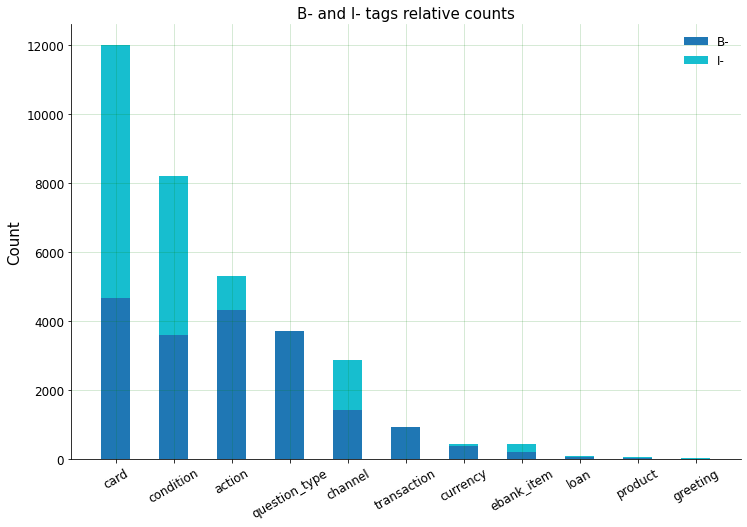

,tags,B- count,I- count,total,ratio
0,card,4682,7319,12001,1.563221
1,condition,3602,4594,8196,1.275403
2,action,4328,978,5306,0.225970
3,question_type,3725,0,3725,0.000000
4,channel,1430,1435,2865,1.003497
5,transaction,925,0,925,0.000000
6,currency,372,60,432,0.161290
7,ebank_item,217,210,427,0.967742
8,loan,50,50,100,1.000000
9,product,42,7,49,0.166667


In [260]:
b_and_i_tags_plotter(df, 'misspelled_requests')

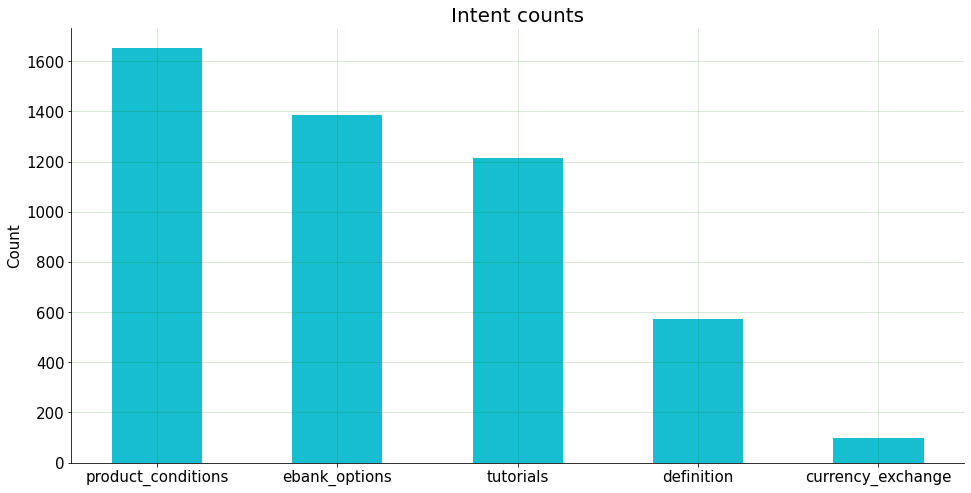

In [263]:
width = 0.5
x = intents_df['intent'].value_counts().index.tolist()
y = intents_df['intent'].value_counts().values.tolist()

fig, ax = plt.subplots(figsize = (16, 8))
ax.bar(x, y, width, color = 'tab:cyan');


ax.set_ylabel('Count', fontsize = 15)
ax.set_title('Intent counts', fontsize = 20)
ax.tick_params(axis = 'x', labelsize = 15) # labelrotation = 30
ax.tick_params(axis = 'y', labelsize = 15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(color = 'g', alpha = 0.2)


fig.savefig('misspelled_requests_intent_counts.jpg', dpi = 180)